In [320]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

<h1 style="font-size:35px;">Data Ingestion</h1>

In [303]:
# Load the raw telecom dataset from a CSV file into a Pandas DataFrame
df_raw_data = pd.read_csv("Telecom_Raw_Data.csv")  # Read CSV file into a DataFrame

# View the first 5 rows to check if data is loaded correctly
df_raw_data.head()  


,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.0,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.0,4562.56,0,1,95117,1


<h1 style="font-size:35px;">Data Understanding</h1>

In [264]:
# 1. Shape of the dataset
print("\nShape of the dataset:", df_raw_data.shape)

# 2. Info about dataframe (data types, non-null count)
print("\nDataFrame Info:")
df_raw_data.info()

# 3. Summary statistics for numeric columns
print("\nDetails (Summary Statistics):")
print(df_raw_data.describe())

# 4. Count of null values per column
print("\nNull values in the dataset:")
print(df_raw_data.isnull().sum())

# 5. Check for duplicated rows
print("\nAre there any duplicated rows?")
print(df_raw_data.duplicated().sum())


Shape of the dataset: (4225, 52)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Country                            4225 non-null   object 
 10  Customer ID                        4225 non-null   object 
 11  Custo

<h1 style="font-size:35px;">Data Engineering</h1>

In [327]:
# 1. Check the number of unique values in location-related columns
print(f"State count: {df_raw_data['State'].nunique()}")       # Number of unique states
print(f"Country count: {df_raw_data['Country'].nunique()}")   # Number of unique countries
print(f"Zip Code count: {df_raw_data['Zip Code'].nunique()}") # Number of unique ZIP codes
print(f"City count: {df_raw_data['City'].nunique()}")         # Number of unique cities

# Observation:
# - All data belongs to customers in the US (California), so 'State' and 'Country' columns are redundant.
# - Latitude and Longitude columns are unnecessary for this analysis.
# - 'Under 30' and 'Senior Citizen' are redundant because 'Age' is already present.
# - 'Quarter' and 'Married' may not be needed for churn analysis.

# 2. Drop unnecessary columns
columns_to_drop = [
    'State', 'Country', 'Senior Citizen', 
    'Lat Long', 'Latitude', 'Longitude', 
    'Under 30', 'Quarter', 'Married'
]

# Create a cleaned DataFrame without the unnecessary columns
df_cleaned_1 = df_raw_data.drop(columns=columns_to_drop)

# 3. View the cleaned DataFrame
# df_cleaned_1.head()   # Display first 5 rows to confirm columns were removed

State count: 1
Country count: 1
Zip Code count: 1594
City count: 1085


In [268]:
# -------------------------------
# Check if Customer ID is Unique
# -------------------------------

# is_unique property returns True if all values in the column are unique, False otherwise
is_unique = df_cleaned_1['Customer ID'].is_unique

# Print the result
print("Is 'Customer ID' unique for all records?", is_unique)

Is 'Customer ID' unique for all records? True


In [331]:
# -------------------------------
# Update Churn Category and Churn Reason for Non-Churned Customers
# -------------------------------

# - 'Churn Category' and 'Churn Reason' are only meaningful for customers who churned (Churn == 1)
# - For customers who did NOT churn (Churn == 0), these columns should indicate "Not Available"

df_cleaned_1.loc[df_cleaned_1['Churn'] == 0, ['Churn Category', 'Churn Reason']] = "Not Available"
df_cleaned_1

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Customer ID,...,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,4526-ZJJTM,...,No,25,2191.15,0,486.00,0.00,2677.15,Yes,94403,No
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,5302-BDJNT,...,Yes,35,3418.20,0,1596.70,0.00,5014.90,Yes,95685,No
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,5468-BPMMO,...,No,46,851.20,0,739.22,0.00,1590.42,No,95064,No
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,2212-LYASK,...,No,27,1246.40,30,0.00,0.00,1276.40,No,92823,No
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,0378-XSZPU,...,No,58,3563.80,0,998.76,0.00,4562.56,Yes,95117,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,36,0,7.76,NaN,NaN,52,Long Beach,4590,Month-to-Month,2369-FEVNO,...,No,1,19.90,0,7.76,0.00,27.66,No,90806,No
4221,77,22,23.43,NaN,NaN,34,San Francisco,5602,One Year,4824-GUCBY,...,No,22,1820.90,0,515.46,29.88,2306.48,Yes,94127,No
4222,56,0,28.06,NaN,NaN,63,Olivehurst,4458,One Year,0859-YGKFW,...,No,18,345.90,0,505.08,0.00,850.98,No,95961,No
4223,45,22,0.00,NaN,NaN,38,Westlake Village,4115,Month-to-Month,0699-NDKJM,...,Yes,57,3437.45,0,0.00,0.00,3437.45,Yes,91361,No


In [330]:
# -------------------------------
# Handle Missing Values in Offer and Internet Type
# -------------------------------
# Fill missing values in 'Offer' column with "No Offer"
df_cleaned_1['Offer'] = df_cleaned_1['Offer'].fillna("No Offer")

# Fill missing values in 'Internet Type' column with "Unknown"
df_cleaned_1['Internet Type'] = df_cleaned_1['Internet Type'].fillna("Unknown")

# Verify unique values after filling nulls
print("Unique values in 'Offer' column:", df_cleaned_1['Offer'].unique())
print("Unique values in 'Internet Type' column:", df_cleaned_1['Internet Type'].unique())

Unique values in 'Offer' column: ['No Offer' 'Offer B' 'Offer E' 'Offer A' 'Offer D' 'Offer C']
Unique values in 'Internet Type' column: ['Fiber Optic' 'Unknown' 'DSL' 'Cable']


In [328]:
# -------------------------------
# Convert Boolean / Binary Columns to Yes / No
# -------------------------------

# List of columns with 0/1 values
bool_columns = [
    'Device Protection Plan', 'Internet Service', 'Multiple Lines',
    'Online Backup', 'Online Security', 'Paperless Billing',
    'Streaming Movies', 'Streaming Music', 'Streaming TV',
    'Unlimited Data', 'Churn', 'Phone Service'
]

# Replace 0 with 'No' and 1 with 'Yes' for better readability
df_cleaned_1[bool_columns] = df_cleaned_1[bool_columns].replace({0: 'No', 1: 'Yes'})


In [329]:
# -------------------------------
# Save the cleaned DataFrame to a CSV file
# -------------------------------
# Export the cleaned dataset for future use
# index=False ensures the row numbers are not written to the file
# encoding='utf-8' ensures proper handling of special characters
df_cleaned_1.to_csv("cleaned_telecom_data.csv", index=False, encoding='utf-8')


<h1 style="font-size:35px;">Analytics Computation</h1>

<h3 style="font-size:25px;">Customer Status Analysis</h3>

In [332]:
# Calculate the percentage distribution of each customer status
# value_counts(normalize=True) gives proportion, multiplying by 100 converts it to percentage
cust_status_rate = df_cleaned_1['Customer Status'].value_counts(normalize=True) * 100

# Display the distribution of customer status
print("Percentage of Customers by Status:")
print(cust_status_rate)

Percentage of Customers by Status:
Customer Status
Stayed     67.029586
Churned    26.532544
Joined      6.437870
Name: proportion, dtype: float64


Customer Status Analysis
The dataset shows that 67% of customers have stayed, 27% have churned, and 6% are newly joined. This indicates a substantial churn segment that requires attention. 

<h3 style="font-size:20px;">Visualization</h3>

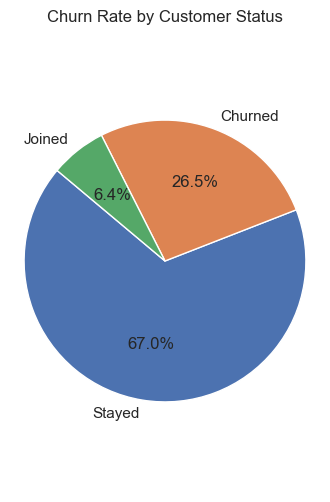

In [276]:
plt.figure(figsize=(4, 6))  # Set the size of the figure

# Create a pie chart showing the proportion of each customer status
plt.pie(
    cust_status_rate,                      # Values to plot
    labels=cust_status_rate.index,         # Labels for each segment
    autopct='%1.1f%%',                     # Display percentage on the chart
    startangle=140                         # Rotate the chart for better visibility
)

plt.title('Churn Rate by Customer Status')  # Title of the plot
plt.axis('equal')                           # Ensure the pie chart is a perfect circle

plt.show()  # Display the chart

<h3 style="font-size:25px;">Insights Based on Contract Type and Churn Status</h3>

In [277]:
# Calculate churn counts for each Contract type

# Group the dataset by 'Contract' and 'Churn' to count how many customers
# churned or stayed under each contract category.
churn_rate_contract = (
    df_cleaned_1
    .groupby(['Contract', 'Churn'])
    .size()
    .reset_index(name='Count')  # Convert counts into a column named 'Count'
)

# Display the churn distribution across different contract types
churn_rate_contract

,Contract,Churn,Count
0,Month-to-Month,No,1196
1,Month-to-Month,Yes,997
2,One Year,No,807
3,One Year,Yes,97
4,Two Year,No,1101
5,Two Year,Yes,27


Month-to-Month customers are highly unstable.
This contract type shows the highest churn risk.

One-Year contracts show moderate churn.
Customers with fixed-term contracts are more loyal than month-to-month users.

Two-Year contracts have the lowest churn.


Long-term customers show very strong retention, indicating better stability.
Retention improves as contract length increases.
This is a typical industry trend — longer commitments reduce churn due to:

Discounts for long-term plans
Higher perceived switching cost
Customer satisfaction with premium services offered in long-term plans

<h3 style="font-size:20px;">Visualization</h3>

<Figure size 800x500 with 0 Axes>

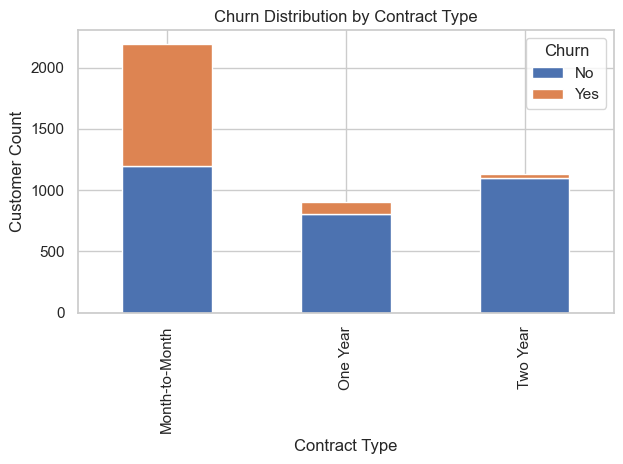

In [279]:
# Pivot table for churn counts by contract type
pivot_df = churn_rate_contract.pivot(index='Contract', columns='Churn', values='Count').fillna(0)

# Plot stacked bar chart
plt.figure(figsize=(8,5))
pivot_df.plot(kind='bar', stacked=True)

plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.title("Churn Distribution by Contract Type")
plt.tight_layout()
plt.show()

<h3 style="font-size:25px;">Insights Based on Customer Demographics: Gender-wise Churn Analysis</h3>

In [322]:
# Churn rate distribution across genders
gender_churn = df_cleaned_1.groupby('Gender')['Customer Status'] \
                           .value_counts(normalize=True) \
                           .unstack() * 100

print("Churn Rate by Gender:")
print(gender_churn['Churned'])

Churn Rate by Gender:
Gender
Female    27.272727
Male      25.800377
Name: Churned, dtype: float64


Female customers have a slightly higher churn rate (27.27%) compared to male customers (25.80%).
                                                                                        
The difference is 1.47 percentage points, indicating a small but noticeable variation.
Churn levels are fairly similar across genders, suggesting gender alone is not a strong driver of churn.

<h3 style="font-size:20px;">Visualization</h3>

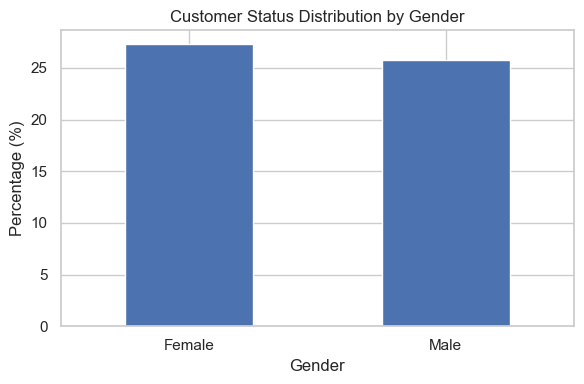

In [323]:
# Plot gender-wise churn distribution
gender_churn['Churned'].plot(kind='bar', figsize=(6,4))

plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.title("Customer Status Distribution by Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h3 style="font-size:25px;">Churn Rate Analysis by Number of Dependents</h3>

In [285]:
# Group customers based on number of dependents and calculate the % distribution 
# of each Customer Status (Stayed, Churned, Joined)
dependents_churn = (
    df_cleaned_1.groupby('Number of Dependents')['Customer Status']
    .value_counts(normalize=True)
    .unstack() * 100
)

# Display churn rate segmented by number of dependents
print("Churn Rate by Number of Dependents:")
print(dependents_churn)

Churn Rate by Number of Dependents:
Customer Status         Churned     Joined      Stayed
Number of Dependents                                  
0                     32.623457   6.882716   60.493827
1                      7.418398   5.341246   87.240356
2                      5.396825   4.126984   90.476190
3                      6.012658   5.063291   88.924051
4                     14.285714  14.285714   71.428571
5                     25.000000  12.500000   62.500000
6                           NaN        NaN  100.000000
8                           NaN        NaN  100.000000


Churn is highest for customers with no dependents, followed by those with 5 dependents.
Customers with 1–3 dependents are the most stable and loyal.
The relationship appears U-shaped:
High churn at 0 dependents
Low churn at 1–3
Rising churn again at 4–5

<h3 style="font-size:20px;">Visualization</h3>

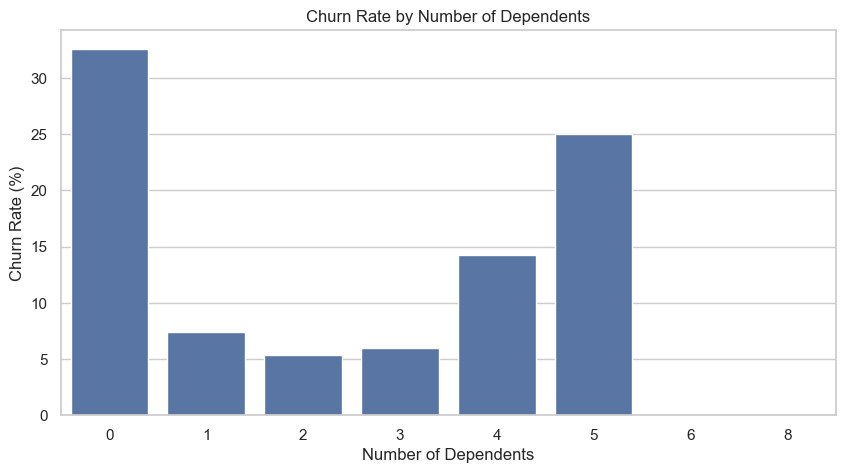

In [324]:
# Plot churn rate by number of dependents
plt.figure(figsize=(10, 5))

# Bar plot using Seaborn with custom color
sns.barplot(
    x=dependents_churn.index,        # X-axis: Number of Dependents
    y=dependents_churn['Churned']   # Y-axis: Churn Rate (%) 
)

# Add title and Y-axis label
plt.title('Churn Rate by Number of Dependents')
plt.ylabel('Churn Rate (%)')

# Display the plot
plt.show()

<h3 style="font-size:25px;">Churn Rate Analysis Based on Cities</h3>

In [293]:
# Group data by City and calculate total customers and number of churned customers
city_stats = df_cleaned_1.groupby('City').agg(
    Total_Customers=('Churn', 'count'),                  # Total customers in each city
    Churned=('Churn', lambda x: sum(x == "Yes")),        # Count of churned customers
)

# Calculate churn rate for each city
city_stats['Churn_Rate'] = city_stats['Churned'] / city_stats['Total_Customers']

# Filter out cities with fewer than 30 customers to avoid misleading statistics
filtered_city_stats = city_stats[city_stats['Total_Customers'] >= 30]

# Sort cities by churn rate in descending order and select top 10
top10 = filtered_city_stats.sort_values('Churn_Rate', ascending=False).head(10)

# Display the top 10 cities with highest churn rate
top10

,Total_Customers,Churned,Churn_Rate
City,,,
San Diego,168,114,0.678571
Escondido,33,10,0.303030
San Jose,61,18,0.295082
Sacramento,60,17,0.283333
San Francisco,61,17,0.278689
Los Angeles,175,48,0.274286
Glendale,30,8,0.266667
Oakland,31,7,0.225806
Long Beach,42,9,0.214286


San Diego has the highest churn rate (67.86%)
More than two-thirds of customers in San Diego have churned.
This city requires urgent attention and retention strategies.
    
Other major cities like Escondido, San Jose, Sacramento, and San Francisco
Churn rates are around 28–30%, which is significant.
These areas may also need targeted campaigns or service improvements.
    
Los Angeles, Glendale, and Oakland
Moderate churn rates (22–27%).
Still worth monitoring and engaging customers proactively.
                      
Fresno and Long Beach
Relatively low churn rates (17–21%).
These cities show better retention, possibly due to customer satisfaction or service reliability.

    
Recommendations:
Focus retention strategies on San Diego and other high-churn cities.
Analyze reasons for churn in these cities (e.g., network issues, pricing, offers).
Tailor promotions, loyalty programs, or improved service packages for high-risk cities.
Monitor moderate-churn cities to prevent future attrition.

<h3 style="font-size:20px;">Visualization</h3>

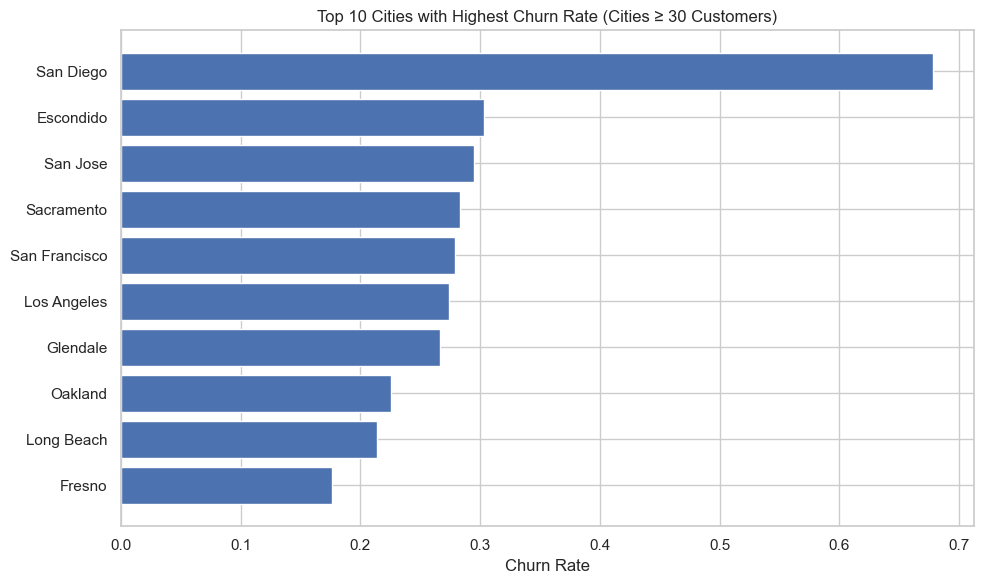

In [300]:
# Plot Top 10 Cities with Highest Churn Rate (for cities with ≥ 30 customers)

plt.figure(figsize=(10,6))  # Set figure size

# Horizontal bar chart: Y-axis = City, X-axis = Churn Rate
plt.barh(top10.index, top10['Churn_Rate'])  # Added custom color for clarity

plt.xlabel("Churn Rate")  # Label X-axis
plt.title("Top 10 Cities with Highest Churn Rate (Cities ≥ 30 Customers)")  # Chart title

plt.gca().invert_yaxis()  # Invert Y-axis to show highest churn city at the top
plt.tight_layout()        # Adjust layout to avoid overlap
plt.show()                # Display the plot

<h3 style="font-size:25px;">Insights Based on Offer Type: Churn Analysis</h3>

In [301]:
# Group data by 'Offer' and calculate the churn distribution (%) for each offer type
churn_rate_offer = (
    df_cleaned_1.groupby('Offer')['Churn']
    .value_counts(normalize=True)   # Get proportion of Yes/No
    .unstack() * 100                # Convert to percentage
)

# Display churn rate by offer type
churn_rate_offer

Churn,No,Yes
Offer,,
No Offer,73.106713,26.893287
Offer A,94.043887,5.956113
Offer B,87.572816,12.427184
Offer C,75.697211,24.302789
Offer D,72.727273,27.272727
Offer E,45.473684,54.526316


Offer E has the highest churn rate (54.53%)
More than half of the customers taking Offer E are leaving.
Indicates possible dissatisfaction or mismatch with customer expectations.
    
Offers A and B have very low churn (5.96% & 12.43%)
Customers are highly satisfied and loyal under these offers.
These could be used as benchmark offers for retention strategies.

No Offer customers show moderate churn (26.89%)
Customers without any offer are at medium risk, suggesting that offering incentives could improve retention.
    
Offer C and D have churn slightly above 24–27%
These customers may need better engagement or additional benefits to reduce churn.
    
Recommendations:
Investigate Offer E for pricing, features, or satisfaction issues.
Promote Offer A and B more widely to encourage loyalty.
Consider targeted incentives for No Offer, C, and D customers to reduce churn.

<h3 style="font-size:20px;">Visualization</h3>

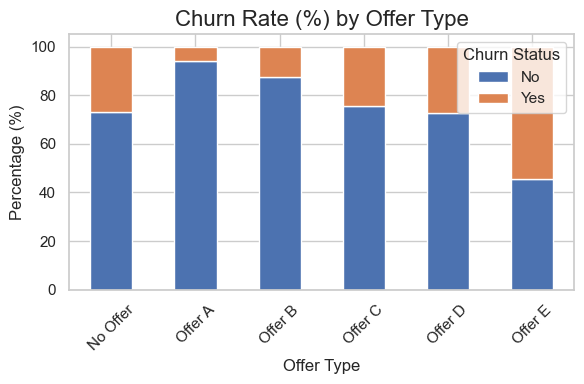

In [305]:
# Plot stacked bar chart of churn rate by offer type
churn_rate_offer.plot(
    kind='bar',        # Stacked bar chart
    stacked=True,      # Stack 'Yes' and 'No' values
    figsize=(6,4)      # Set figure size
)

# Add title and axis labels with font size
plt.title("Churn Rate (%) by Offer Type", fontsize=16)
plt.xlabel("Offer Type", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)

# Add legend with title
plt.legend(title="Churn Status")

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Display the chart
plt.show()

<h3 style="font-size:25px;">Churn Rate Analysis Based on Phone Service and Internet Type</h3>

In [308]:
# Grouping by Phone Service and Internet Type to calculate churn percentages
churn_rate_service_internet = (
    df_cleaned_1.groupby(['Phone Service', 'Internet Type'])['Churn']
    .value_counts(normalize=True)   # Convert to percentage
    .unstack()                    # Separate 'Yes' and 'No' columns
)

# Display churn rate table
print("Churn Rate (%) Based on Phone Service and Internet Type:")
print(churn_rate_service_internet)

Churn Rate (%) Based on Phone Service and Internet Type:
Churn                              No       Yes
Phone Service Internet Type                    
No            Cable          0.801471  0.198529
              DSL            0.726644  0.273356
Yes           Cable          0.734973  0.265027
              DSL            0.831711  0.168289
              Fiber Optic    0.599235  0.400765
              Unknown        0.927765  0.072235


Fiber Optic users with Phone Service show the highest churn (40.07%)
This indicates fiber customers are more dissatisfied, likely due to pricing, service quality, or competition.
Phone service paired with fiber may not be improving retention.

Customers without Phone Service churn more for DSL (27.33%) and Cable (19.85%)
Not having a phone service may reduce service bundling benefits.
Customers with fewer bundled services often churn more because:
They get fewer discounts
Lower “switching cost”
Less loyalty
                                                                       
DSL + Phone Service shows the lowest churn (16.82%)
DSL customers with phone service seem more stable.
Possibly due to bundled packages or lower expectations.
                                            
Unknown Internet Type has extremely low churn (7.22%)
                                               
Cable Internet is moderately stable (~20–26% churn)
Users show consistent churn regardless of phone service.
This suggests Cable has a reliable experience but still loses 1 in 4 customers.
                                               
Fiber Optic + Phone Service = highest churn → needs urgent attention.
DSL + Phone Service = most loyal group.
Bundling with phone service generally reduces churn, except for fiber customers.
"Unknown" internet type needs data correction.

<h3 style="font-size:20px;">Visualization</h3>

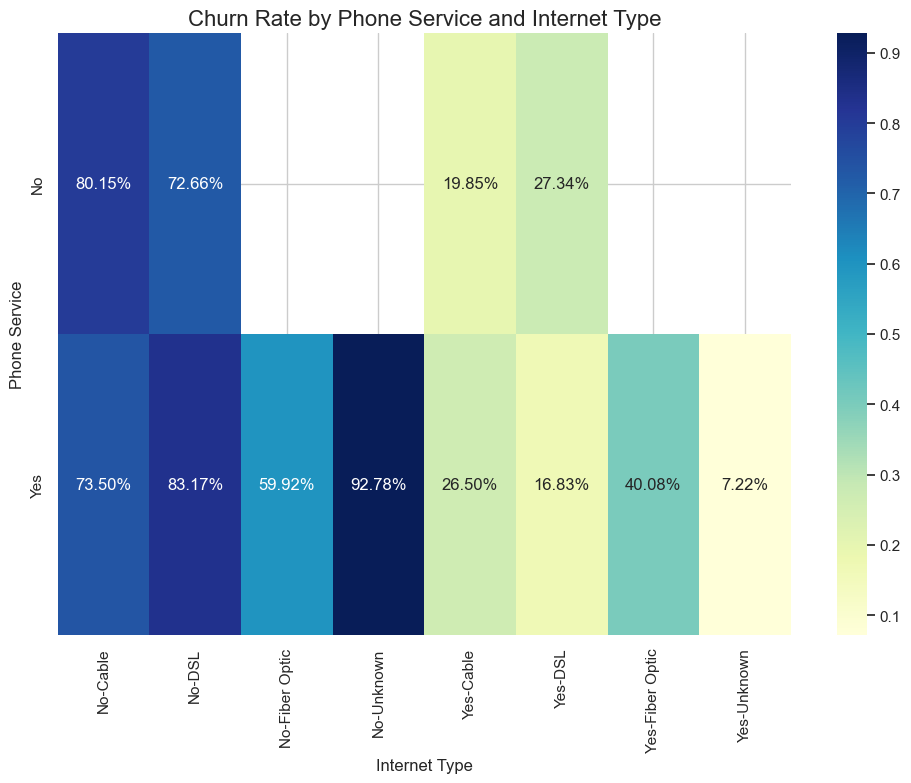

In [325]:
# ---Heatmap ---
plt.figure(figsize=(10, 8))

# Using heatmap to visualize churn % across categories
sns.heatmap(
    churn_rate_service_internet.unstack(),  # Reshape for heatmap
    annot=True,                             # Show labels inside each cell
    cmap="YlGnBu",                           # Color palette
    fmt=".2%"                                # Format percentages
)

plt.title("Churn Rate by Phone Service and Internet Type", fontsize=16)
plt.xlabel("Internet Type", fontsize=12)
plt.ylabel("Phone Service", fontsize=12)
plt.tight_layout()
plt.show()

<h3 style="font-size:25px;">Frequency of Churn Reasons (Why Customers Left)</h3>

In [311]:
# Filter only churned customers and count how many times each reason appears
churn_reason_freq = (
    df_cleaned_1[df_cleaned_1['Churn'] == 'Yes']['Churn Reason']
    .value_counts()   # Count frequency of each churn reason
)

churn_reason_freq

Churn Reason
Competitor had better devices                188
Competitor made better offer                 187
Attitude of support person                   136
Don't know                                    87
Attitude of service provider                  64
Competitor offered more data                  57
Competitor offered higher download speeds     54
Network reliability                           46
Price too high                                44
Product dissatisfaction                       42
Long distance charges                         39
Service dissatisfaction                       32
Moved                                         32
Extra data charges                            27
Limited range of services                     25
Lack of affordable download/upload speed      20
Lack of self-service on Website               17
Poor expertise of online support              14
Deceased                                       6
Poor expertise of phone support                4
Name: c

Insights Based on Churn Reasons

Competitor-Driven Churn is the Top Cause
The highest churn contribution comes from competitor-related reasons, including:
Competitor had better devices (188 customers)
Competitor made better offer (187 customers)
Competitor offered more data (57 customers)
Competitor offered higher download speeds (54 customers)
Customers are highly sensitive to external competition, especially regarding device quality, pricing, data limits, 
and speed. This indicates a need to strengthen competitive offerings.

    
Customer Support Issues Are Another Major Driver
Attitude of support person (136)
Attitude of service provider (64)
Poor expertise of online support (14)
Poor expertise of phone support (4)
Support-related reasons account for a significant share of churn. Improving the attitude, availability, and 
technical expertise of support staff can reduce churn substantially.


Service Quality & Reliability Problems Also Contribute
Network reliability (46)
Service dissatisfaction (32)
Product dissatisfaction (42)
Limited range of services (25)
Lack of affordable speed (20)
Service reliability and overall product performance remain notable issues. Customers expect consistent 
connectivity, better pricing, and broader service options.

Price-Related Churn Exists but is Not the Primary Driver
Price too high (44)
Long distance charges (39)
Extra data charges (27)
Although not the top category, pricing concerns are still relevant. This suggests the company may need 
to re-evaluate price sensitivity and package optimization.

<h3 style="font-size:20px;">Visualization</h3>

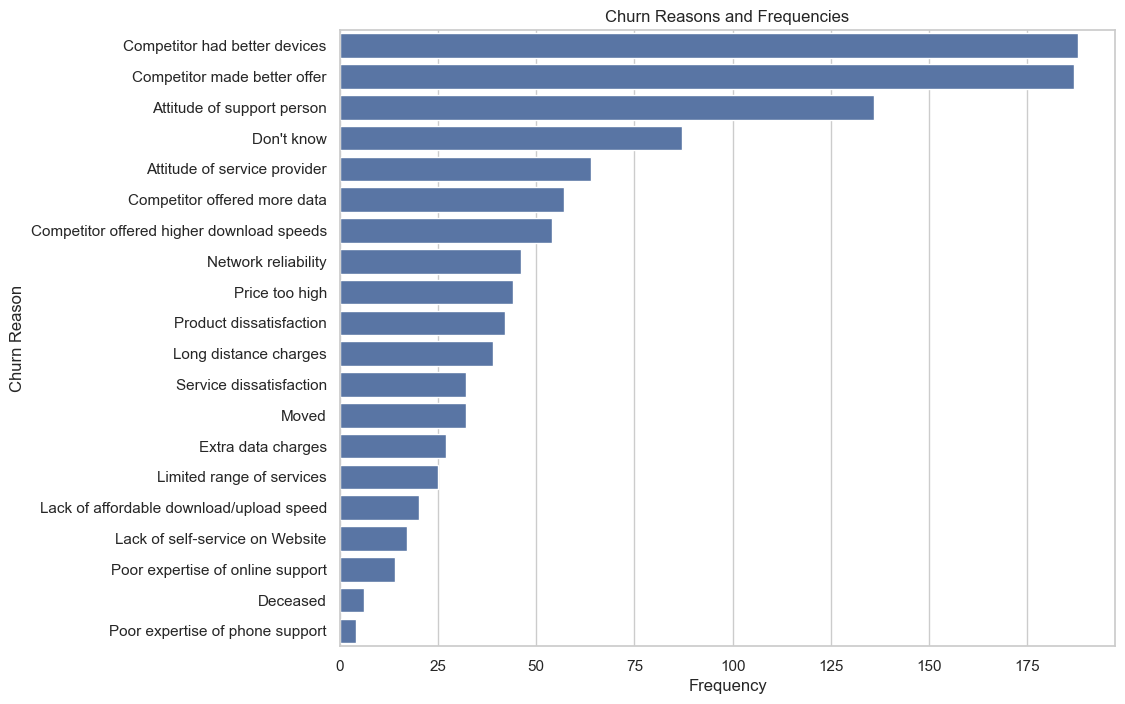

In [314]:
# Plot churn reasons and their frequencies
plt.figure(figsize=(10, 8))  # Set the size of the figure

# Create a horizontal barplot of churn reasons vs frequency
sns.barplot(y=churn_reason_freq.index, x=churn_reason_freq.values)

plt.title('Churn Reasons and Frequencies')   # Add chart title
plt.xlabel('Frequency')                      # Label for X-axis
plt.ylabel('Churn Reason')                   # Label for Y-axis

plt.show()  # Display the plot

<h3 style="font-size:25px;">Analysis of Churn by Payment Method and Paperless Billing</h3>

In [316]:
# Calculate churn rate (%) based on Payment Method and Paperless Billing
df_churn_pay_paperless = df_cleaned_1.groupby(['Payment Method','Paperless Billing'])['Churn'] \
                                     .value_counts(normalize=True).unstack()

df_churn_pay_paperless  # Display the churn percentages table



Churn                                    No       Yes
Payment Method  Paperless Billing                    
Bank Withdrawal No                 0.793923  0.206077
                Yes                0.600765  0.399235
Credit Card     No                 0.897406  0.102594
                Yes                0.789663  0.210337
Mailed Check    No                 0.717949  0.282051
                Yes                0.572816  0.427184

Paperless Billing leads to higher churn in all payment methods
Across Bank Withdrawal, Credit Card, and Mailed Check:
Paperless Billing = Yes consistently has higher churn than customers with Paperless Billing = No.
                                                                                           
This may be due to:
Less customer contact
Customers forgetting usage/charges
Lower perceived transparency

Customers paying via Mailed Check + Paperless Billing = HIGH-RISK group
Churn Rate for Mailed Check:
No Paperless Billing: 28.2%
With Paperless Billing: 42.7% (highest among all combinations)

This combination indicates:
Customers who prefer traditional methods may not adapt well to paperless billing.
Paperless billing may cause dissatisfaction among check-paying customers.

Bank Withdrawal + Paperless Billing is also risky
Churn increases sharply from 20.6% → 39.9%
Customers using automatic bank withdrawals may be sensitive to unexpected charges or lack of control.

Credit Card customers are the most stable group
Lowest churn across payment methods.
Even paperless billing leads to only 21% churn, much lower compared to other methods.


Paperless Billing is a major churn driver across all payment methods.
Targeted retention strategies should focus on:
Customers using Mailed Check + Paperless Billing
Customers using Bank Withdrawal + Paperless Billing
Transparent billing reminders, educational outreach, or optional paper statements may reduce churn.

<h3 style="font-size:20px;">Visualization</h3>

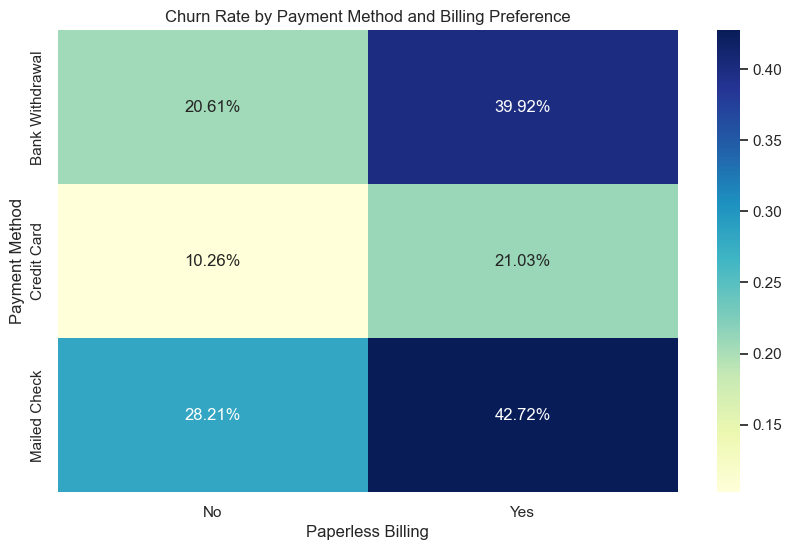

In [318]:
# ----------- (Heatmap of Churn = YES only) -----------

plt.figure(figsize=(10, 6))  # Set figure size

# Plot churn rate for "Yes" only to highlight risk segments
sns.heatmap(
    df_churn_pay_paperless['Yes'].unstack(),  # Pivoted data for heatmap
    annot=True,                               # Show values on the heatmap
    cmap="YlGnBu",                             # Color theme
    fmt=".2%"                                  # Format as percentage
)

plt.title('Churn Rate by Payment Method and Billing Preference')  # Chart title
plt.xlabel('Paperless Billing')                                  # X-axis label
plt.ylabel('Payment Method')                                     # Y-axis label

plt.show()  # Display the heatmap

<h3 style="font-size:25px;">Churn Comparison Across Data and Device Protection Plans</h3>

In [339]:
columns_to_analyze = ['Unlimited Data', 'Device Protection Plan', 'Churn']

# Make a copy
plan_df = df_cleaned_1[columns_to_analyze].copy()

# Cleaning and preprocessing
plan_df['Unlimited Data'] = plan_df['Unlimited Data'].map({
    'Yes': 'With Unlimited Data', 
    'No': 'Without Unlimited Data'
})

plan_df['Device Protection Plan'] = plan_df['Device Protection Plan'].map({
    'Yes': 'With Device Protection', 
    'No': 'Without Device Protection'
})

# Group by
churn_by_plans = plan_df.groupby(
    ['Unlimited Data', 'Device Protection Plan', 'Churn']
).size().unstack(fill_value=0)

churn_by_plans


Churn                                              No  Yes
Unlimited Data         Device Protection Plan             
With Unlimited Data    With Device Protection     993  278
                       Without Device Protection  969  624
Without Unlimited Data With Device Protection     147   48
                       Without Device Protection  995  171

Insights on Churn Based on Unlimited Data & Device Protection Plans
Customers With Unlimited Data Have Lower Churn — Especially With Protection Plan
With Unlimited Data + With Device Protection
Churn count: 278 out of 1271 customers
This is the lowest churn segment among the four groups.
Customers using both Unlimited Data and Protection Plan appear more satisfied and loyal.

Unlimited Data Without Protection Leads to Higher Churn
With Unlimited Data + Without Device Protection
Churn count: 624
Although they have unlimited data, lack of device protection seems to increase churn risk.
This suggests customers value device protection more than expected.
    
Without Unlimited Data = Higher Churn Risk
Customers without unlimited data show noticeably higher churn overall:
Without Unlimited Data + Without Protection → 171 churn
Without Unlimited Data + With Protection → 48 churn
This confirms that data limitations contribute significantly to churn.

Device Protection Helps More When Data Is Limited
When customers don’t have unlimited data, having a protection plan reduces churn:
With Protection: 48 churn
Without Protection: 171 churn
This implies the Device Protection Plan compensates for lack of unlimited data, reducing dissatisfaction.

<h3 style="font-size:20px;">Visualization</h3>

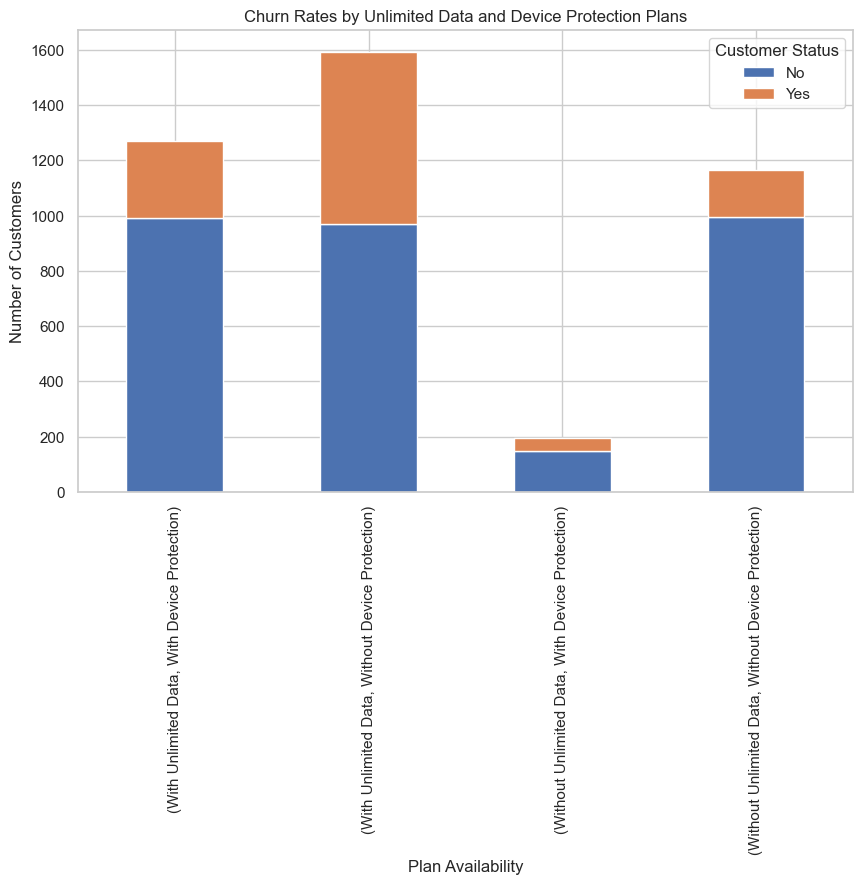

In [319]:
# Plot churn distribution using stacked bar chart
churn_by_plans.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the chart title
plt.title('Churn Rates by Unlimited Data and Device Protection Plans')

# Label the x-axis and y-axis
plt.xlabel('Plan Availability')
plt.ylabel('Number of Customers')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend with a clear title
plt.legend(title='Customer Status', loc='upper right')

# Display the final plot
plt.show()

<h3 style="font-size:30px;">Consolidated Dashboard of Churn Analytics</h3>


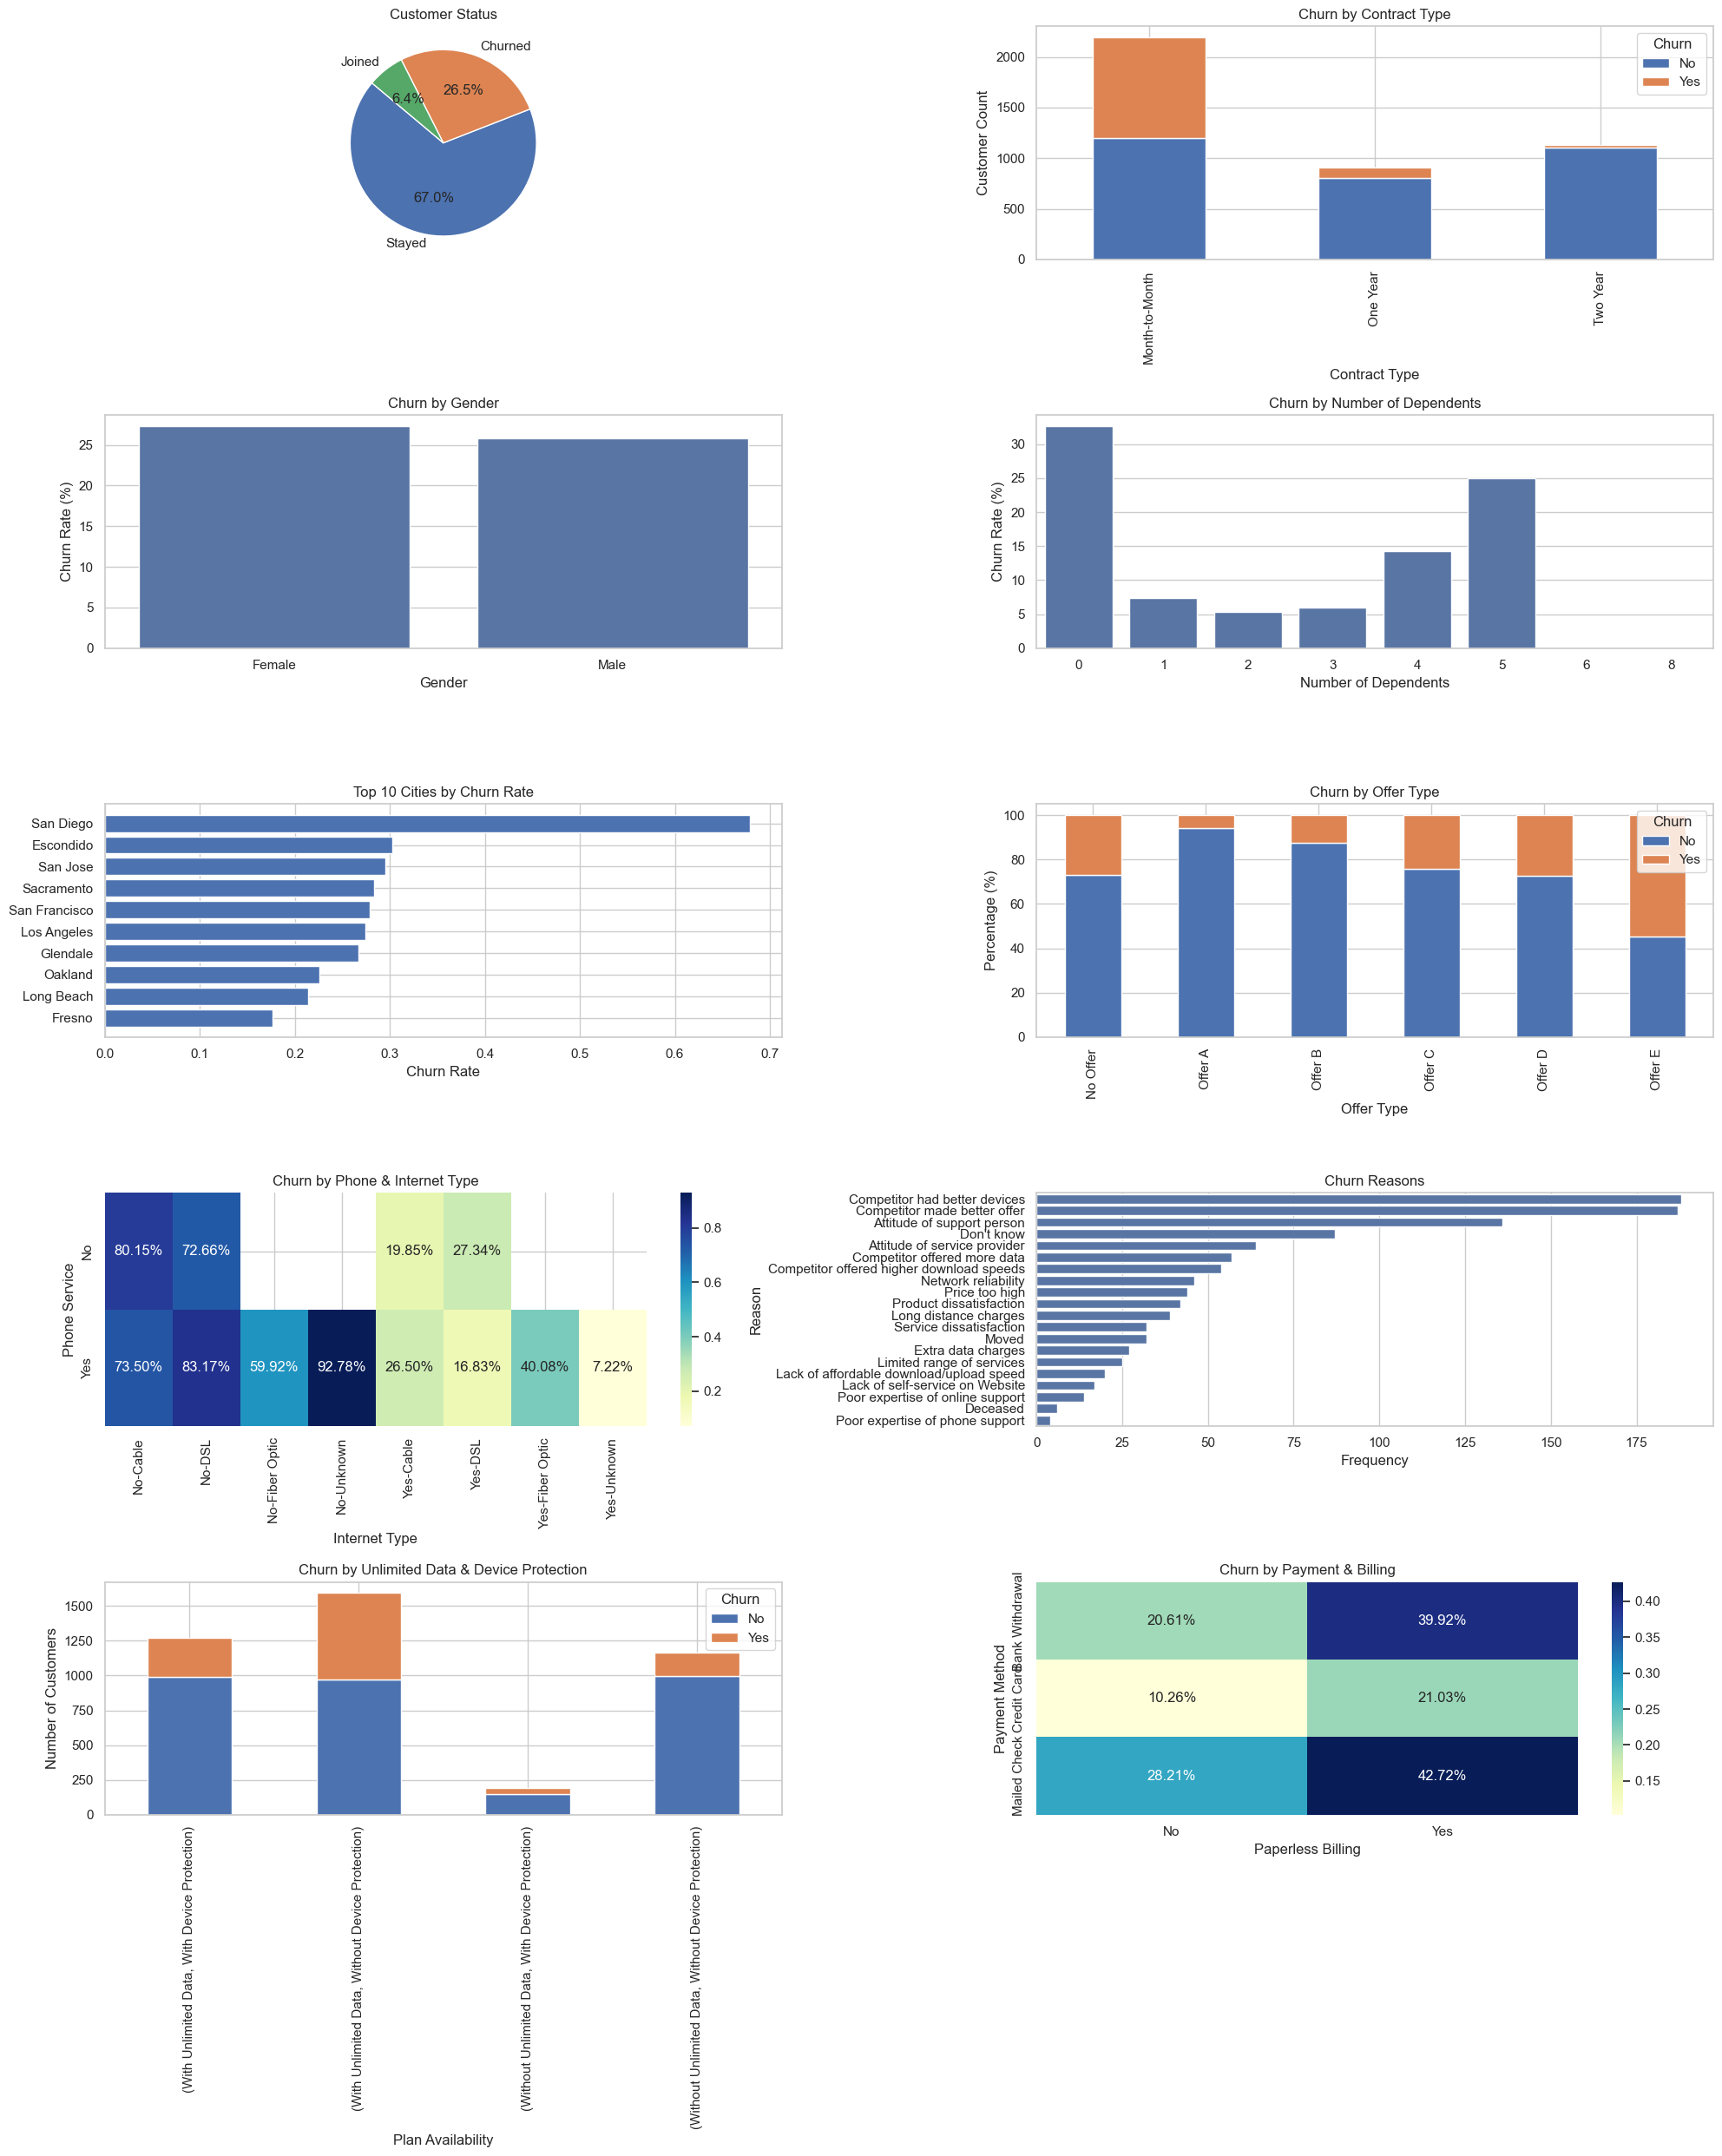

In [338]:
fig, axes = plt.subplots(5, 2, figsize=(20, 25))  # 5 rows, 2 columns
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# 1) Customer Status Pie Chart
axes[0].pie(cust_status_rate, labels=cust_status_rate.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Customer Status')

# 2) Contract Type Stacked Bar Chart
pivot_df.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Churn by Contract Type')
axes[1].set_xlabel('Contract Type')
axes[1].set_ylabel('Customer Count')

# 3) Gender-wise Churn
sns.barplot(x=gender_churn.index, y=gender_churn['Churned'], ax=axes[2])
axes[2].set_title('Churn by Gender')
axes[2].set_ylabel('Churn Rate (%)')

# 4) Dependents-wise Churn
sns.barplot(x=dependents_churn.index, y=dependents_churn['Churned'], ax=axes[3])
axes[3].set_title('Churn by Number of Dependents')
axes[3].set_ylabel('Churn Rate (%)')

# 5) Top 10 Cities Churn Rate
axes[4].barh(top10.index, top10['Churn_Rate'])
axes[4].invert_yaxis()
axes[4].set_title('Top 10 Cities by Churn Rate')
axes[4].set_xlabel('Churn Rate')

# 6) Offer-wise Churn
churn_rate_offer.plot(kind='bar', stacked=True, ax=axes[5])
axes[5].set_title('Churn by Offer Type')
axes[5].set_xlabel('Offer Type')
axes[5].set_ylabel('Percentage (%)')

# 7) Phone Service & Internet Type Heatmap
sns.heatmap(churn_rate_service_internet.unstack(), annot=True, fmt=".2%", cmap="YlGnBu", ax=axes[6])
axes[6].set_title('Churn by Phone & Internet Type')
axes[6].set_xlabel('Internet Type')
axes[6].set_ylabel('Phone Service')

# 8) Churn Reasons Horizontal Bar
sns.barplot(y=churn_reason_freq.index, x=churn_reason_freq.values, ax=axes[7])
axes[7].set_title('Churn Reasons')
axes[7].set_xlabel('Frequency')
axes[7].set_ylabel('Reason')

# 9) Unlimited Data & Device Protection Stacked Bar (was 10)
churn_by_plans.plot(kind='bar', stacked=True, ax=axes[8])
axes[8].set_title('Churn by Unlimited Data & Device Protection')
axes[8].set_xlabel('Plan Availability')
axes[8].set_ylabel('Number of Customers')
axes[8].tick_params(axis='x', rotation=90)

# 10) Payment Method & Paperless Billing Heatmap (was 9)
sns.heatmap(df_churn_pay_paperless['Yes'].unstack(), annot=True, fmt=".2%", cmap="YlGnBu", ax=axes[9])
axes[9].set_title('Churn by Payment & Billing')
axes[9].set_xlabel('Paperless Billing')
axes[9].set_ylabel('Payment Method')

plt.tight_layout()
plt.savefig("churn_analysis_subplots.png", dpi=300)  # Save as high-res image
plt.show()
